## Immporting the libraries

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



SyntaxError: invalid syntax (3807624537.py, line 2)

## Set up and Data Loading

In [6]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import re
import os

# 2. Load the data in chunks
chunk_size = 50000
chunks = pd.read_csv(
    'C:/Users/My Device/Desktop/Week-1/data/raw/newsData/raw_analyst_ratings.csv', 
    chunksize=chunk_size,
    encoding='latin1'
)
df = next(chunks)  # Load first chunk for initial analysis

## Initial data exploration


In [7]:
# 3. Basic Data Overview
print("Data shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nData types and missing values:")
display(df.info())
print("\nBasic statistics:")
display(df.describe(include='all'))

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Data shape: (50000, 6)

First few rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   headline    50000 non-null  object
 2   url         50000 non-null  object
 3   publisher   50000 non-null  object
 4   date        50000 non-null  object
 5   stock       50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


None


Basic statistics:


,Unnamed: 0,headline,url,publisher,date,stock
count,50000.000000,50000,50000,50000,50000,50000
unique,NaN,41840,45832,442,4670,176
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2009-08-10 00:00:00,AA
freq,NaN,196,57,8457,180,2739
mean,25510.050200,NaN,NaN,NaN,NaN,NaN
std,14501.420041,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,12990.750000,NaN,NaN,NaN,NaN,NaN
50%,25505.500000,NaN,NaN,NaN,NaN,NaN
75%,38063.250000,NaN,NaN,NaN,NaN,NaN



Number of duplicate rows: 0


## Task Analysis

In [8]:
# 4. Text Analysis
# 4.1 Headline Analysis
df['headline_length'] = df['headline'].apply(lambda x: len(str(x)))
df['word_count'] = df['headline'].apply(lambda x: len(str(x).split()))

# 4.2 Sentiment Analysis (on a sample)
sample_size = min(10000, len(df))
sample_df = df.sample(sample_size, random_state=42)

def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return np.nan

sample_df['sentiment'] = sample_df['headline'].apply(get_sentiment)

## Time Based Analysis

In [9]:
# 5. Time-based Analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    df['date_only'] = df['date'].dt.date
    df['year_month'] = df['date'].dt.to_period('M')

C:\Users\My Device\AppData\Local\Temp\ipykernel_10904\1333351106.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


## Publisher Analysis

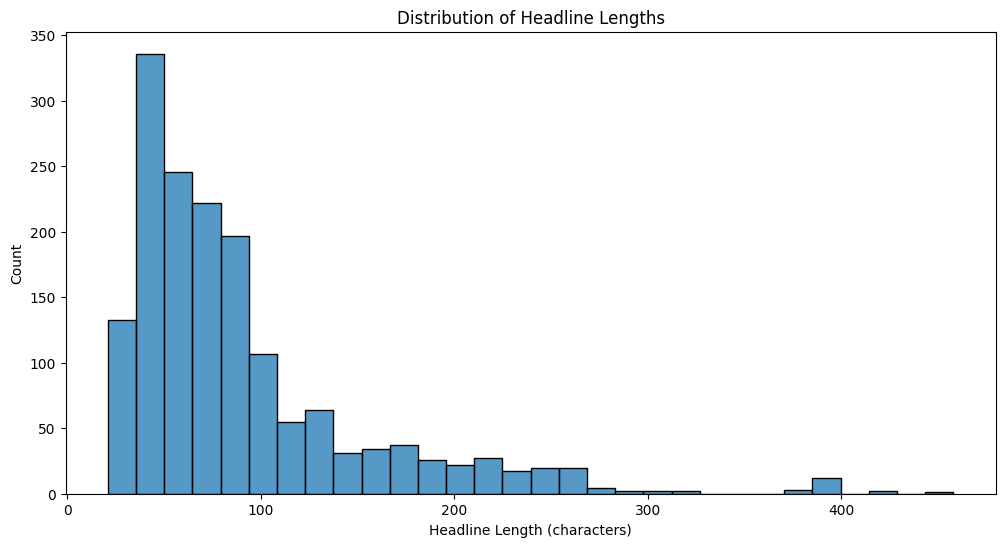

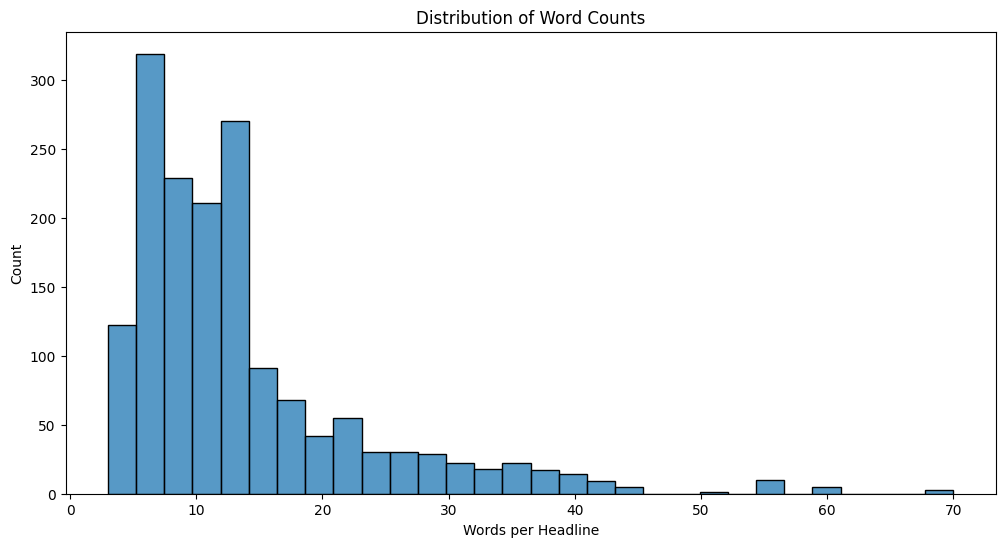

NameError: name 'publisher_counts' is not defined

<Figure size 1200x600 with 0 Axes>

In [10]:
# 7.1 Headline Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.show()

# 7.2 Word Count Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=30)
plt.title('Distribution of Word Counts')
plt.xlabel('Words per Headline')
plt.show()

# 7.3 Top Publishers
if 'publisher' in df.columns:
    plt.figure(figsize=(12, 6))
    top_publishers = publisher_counts.head(10)
    sns.barplot(x=top_publishers.values, y=top_publishers.index)
    plt.title('Top 10 Publishers by Article Count')
    plt.xlabel('Number of Articles')
    plt.tight_layout()
    plt.show()

# 7.4 Articles Over Time
if 'year_month' in df.columns:
    plt.figure(figsize=(15, 6))
    df['year_month'].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Articles Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 7.5 Sentiment Analysis
if 'sentiment' in sample_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(sample_df['sentiment'], bins=30)
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Polarity (-1 to 1)')
    plt.show()

## Visualization of News Data

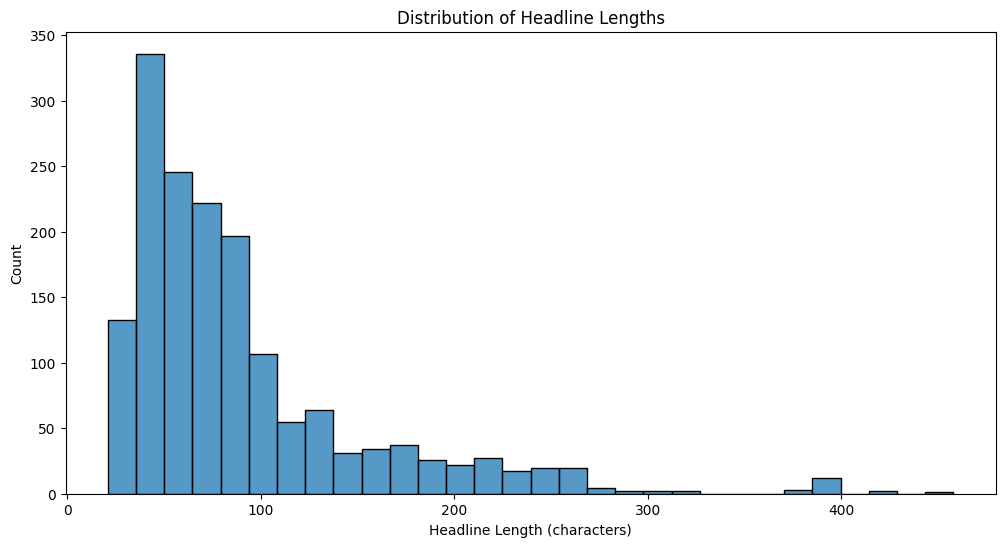

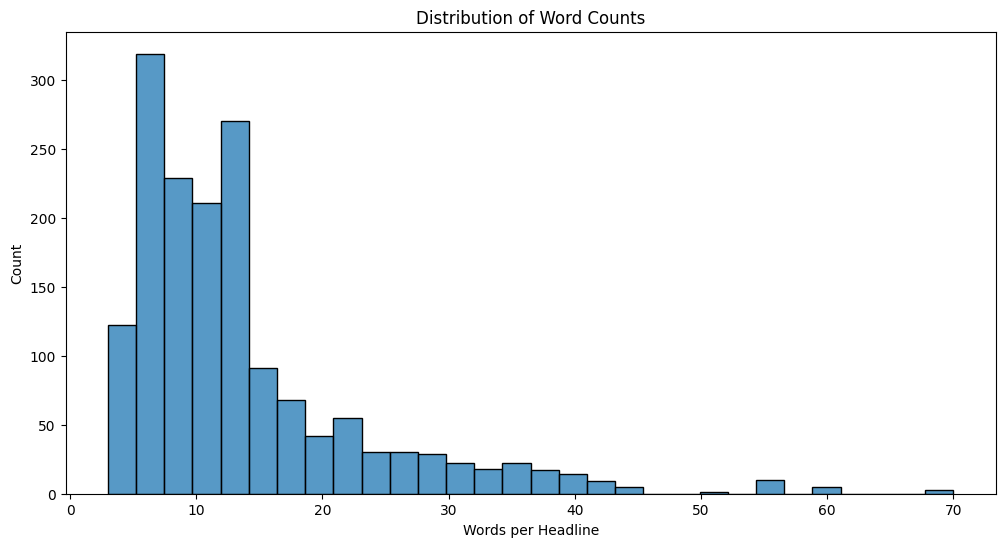

NameError: name 'publisher_counts' is not defined

<Figure size 1200x600 with 0 Axes>

In [11]:
# 7.1 Headline Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.show()

# 7.2 Word Count Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=30)
plt.title('Distribution of Word Counts')
plt.xlabel('Words per Headline')
plt.show()

# 7.3 Top Publishers
if 'publisher' in df.columns:
    plt.figure(figsize=(12, 6))
    top_publishers = publisher_counts.head(10)
    sns.barplot(x=top_publishers.values, y=top_publishers.index)
    plt.title('Top 10 Publishers by Article Count')
    plt.xlabel('Number of Articles')
    plt.tight_layout()
    plt.show()

# 7.4 Articles Over Time
if 'year_month' in df.columns:
    plt.figure(figsize=(15, 6))
    df['year_month'].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Articles Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 7.5 Sentiment Analysis
if 'sentiment' in sample_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(sample_df['sentiment'], bins=30)
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Polarity (-1 to 1)')
    plt.show()

## Word Cloud 

In [ ]:
# 8. Word Cloud of Headlines
if len(df) > 10000:
    text_sample = " ".join(str(headline) for headline in df['headline'].sample(10000, random_state=42))
else:
    text_sample = " ".join(str(headline) for headline in df['headline'])

wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     stopwords=set(stopwords.words('english'))).generate(text_sample)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

## Additional EDA

In [ ]:
# 9. Sentiment Over Time (if date and sentiment are available)
if all(col in sample_df.columns for col in ['date', 'sentiment']):
    plt.figure(figsize=(15, 6))
    sample_df.set_index('date')['sentiment'].resample('M').mean().plot()
    plt.title('Average Monthly Sentiment Over Time')
    plt.ylabel('Average Sentiment Score')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()